## Linear Pipeline, Giessen-style synthetic data. 5 sensitive parameters.

In [1]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Import Simulation Data and Conduct PCA

Import the input and output data. Here we also import the recorded boolean variables where input parameters lead to a failed output. 

In [2]:
# specify which dataset 
n_samples = 500
n_params = 5

input_file = pd.read_csv(f"../Emulation/Input/input_{n_samples}_{n_params}params.csv")
output_file = pd.read_csv(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/resampled_all_pressure_traces_rv.csv")


bool_exist = False
if bool_exist:
 boolean_index = pd.read_csv(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/bool_indices_{n_samples}.csv")

In [3]:
output_file

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.425990,0.365363,...,17.842948,46.485493,29.810470,32.770222,0.358715,0.227437,0.011110,0.559368,0.483201,124.171806
1,2.374772,1.868053,1.457316,1.132088,0.880761,0.691446,0.552692,0.453999,0.386159,0.341405,...,13.870385,43.126933,20.825154,25.515489,0.517120,0.126640,0.020725,1.070906,0.813923,73.717062
2,3.574609,2.871468,2.295324,1.833546,1.471666,1.194535,0.987291,0.836111,0.728704,0.654571,...,14.198399,40.225590,27.581034,29.132104,0.314341,0.463087,0.021132,0.458451,0.960089,62.494199
3,1.482799,1.162859,0.904226,0.700045,0.542785,0.424791,0.338732,0.277924,0.236521,0.209607,...,8.700673,29.501717,13.854965,19.893798,0.530367,0.070679,0.015469,1.129324,0.620494,96.697195
4,2.597491,2.023392,1.558599,1.190695,0.906135,0.691223,0.532888,0.419253,0.339969,0.286370,...,16.982045,46.692317,25.044438,29.293639,0.463628,0.117975,0.013639,0.864379,0.557470,107.629188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.098053,1.656948,1.300650,1.019284,0.802177,0.638606,0.518399,0.432354,0.372493,0.332159,...,11.951210,31.834026,19.684723,20.785952,0.381645,0.204250,0.012898,0.617195,0.538443,111.432426
496,2.384404,1.871600,1.455276,1.124923,0.868883,0.675219,0.532427,0.429967,0.358598,0.310531,...,14.870433,42.658207,21.760492,24.869646,0.489887,0.124551,0.022394,0.960351,0.879028,68.257186
497,2.732419,2.158420,1.692112,1.321801,1.034517,0.816981,0.656394,0.541028,0.460587,0.406382,...,13.932399,39.243201,23.486145,25.593874,0.401523,0.214388,0.014625,0.670909,0.573389,104.640951
498,3.006426,2.328668,1.780655,1.347309,1.012328,0.759333,0.572783,0.438624,0.344666,0.280731,...,18.568277,53.803941,28.687928,36.583343,0.466806,0.110995,0.010455,0.875491,0.436105,137.581667


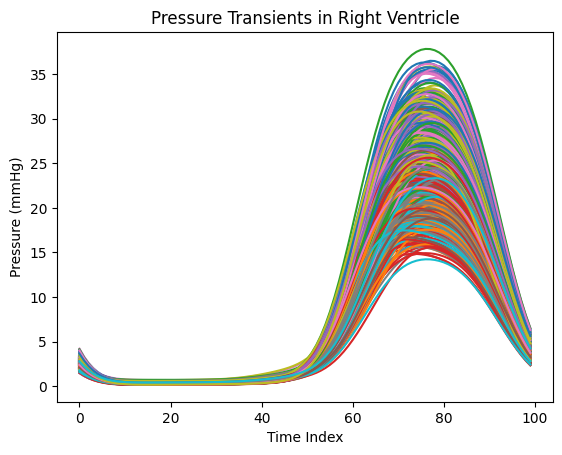

In [4]:
# Initialize the plot
fig, ax = plt.subplots()

for ind in range(len(output_file)): 
    t = range(100) # Time adjustment
    p_pat = output_file.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Right Ventricle')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

In [5]:
# Clean the input data to remove failed to converge simulations
if bool_exist:
    cleaned_input_df = input_file.drop(boolean_index['0'].values)
   
else: 
    cleaned_input_df = input_file.copy()
    
cleaned_input_df.head()

,# svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,...,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v
0,27.687002,0.443723,3.278327,1.623082,0.478369,0.003,0.08,0.000062,0.0,1.07,...,0.043053,0.043053,0.215266,0.215266,0.825124,16.502477,285.565067,1.856529,33.812820,211.437983
1,10.935100,0.243385,4.286711,2.717826,0.805784,0.003,0.08,0.000062,0.0,1.07,...,0.072521,0.072521,0.362603,0.362603,1.170779,23.415582,160.032337,2.634253,62.734898,300.012150
2,18.671167,0.356841,2.549143,0.822205,0.950488,0.003,0.08,0.000062,0.0,1.07,...,0.085544,0.085544,0.427720,0.427720,1.009630,20.192605,235.637189,2.271668,32.171151,258.717757
3,24.992088,0.155291,5.101243,3.333386,0.614289,0.003,0.08,0.000062,0.0,1.07,...,0.055286,0.055286,0.276430,0.276430,0.838841,16.776818,262.054823,1.887392,53.489138,214.952987
4,22.700741,0.326891,3.862239,2.779415,0.551895,0.003,0.08,0.000062,0.0,1.07,...,0.049671,0.049671,0.248353,0.248353,0.899373,17.987457,255.205378,2.023589,43.419907,230.464296


### Compute PCA Data

In [6]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

df = output_file.copy()

# Copy the data and separate the target variable (only pressure traces)
X = df.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=df.index)

X_pca.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.010339,-4.927742,-4.849830,1.054255,-0.714207,0.381396,-0.018271,-0.022392,-0.050590,-0.003390
1,-0.147596,0.188386,5.681269,-0.066665,0.287002,-0.056247,-0.194370,-0.002514,-0.053617,-0.004038
2,14.818185,12.657518,0.098421,-1.961298,-0.284584,0.117592,0.102575,-0.011058,-0.017913,0.096165
3,-14.628978,0.250733,3.345147,-0.363549,0.493110,0.461691,-0.029789,0.013657,0.015726,0.023424
4,-2.443804,-6.535087,-0.038967,0.316542,0.223709,-0.063933,0.051643,0.069657,-0.019264,0.007334


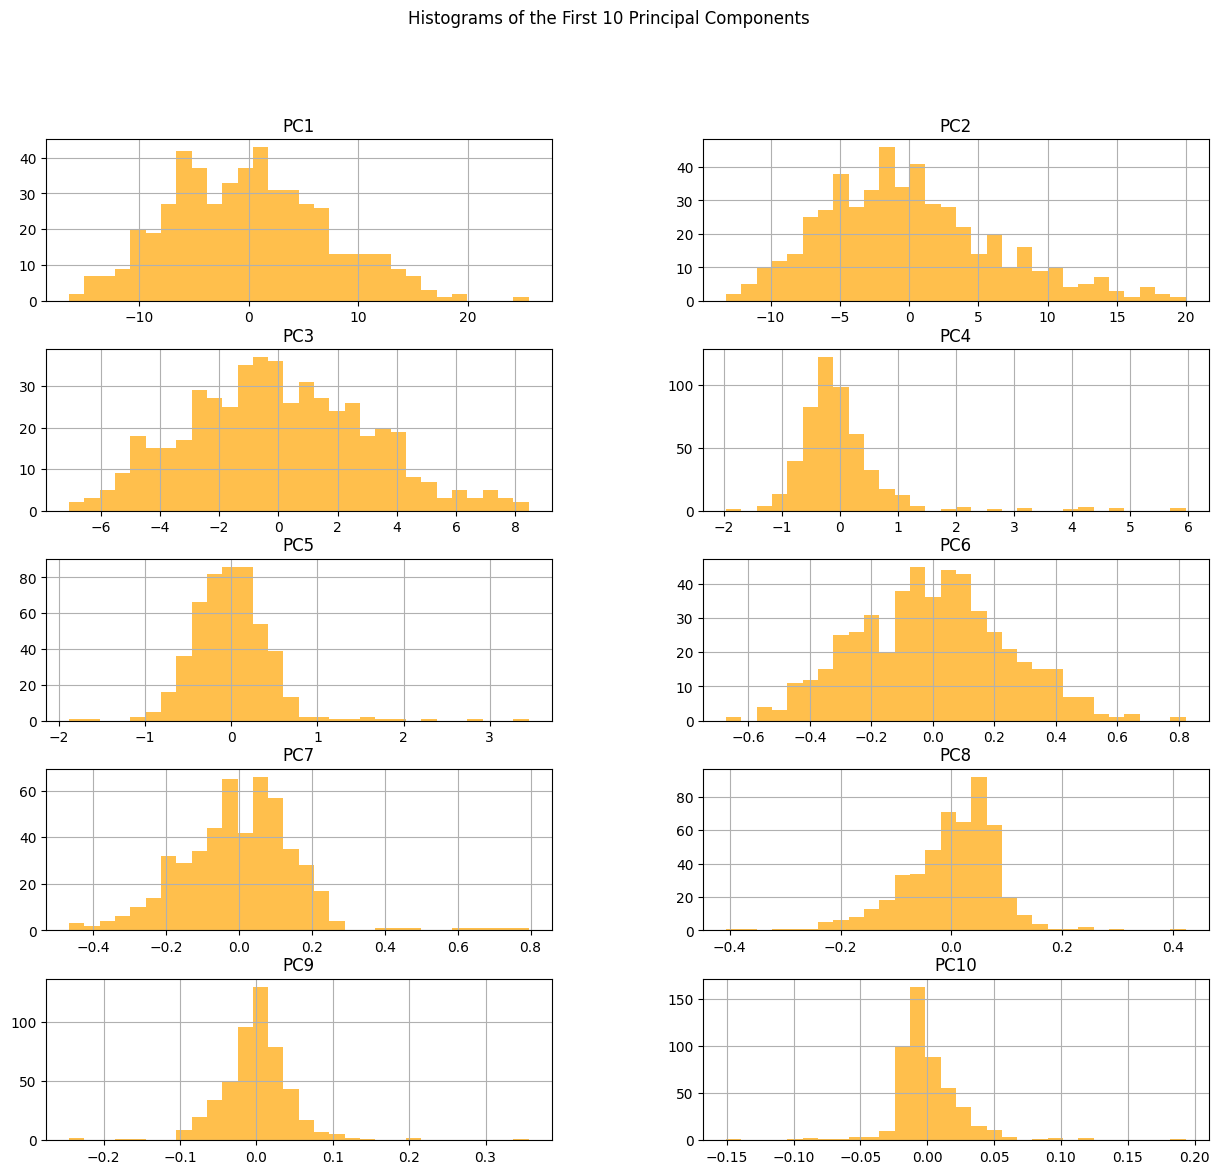

In [7]:
# Plot Histograms
X_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_30502/3676337090.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set(


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

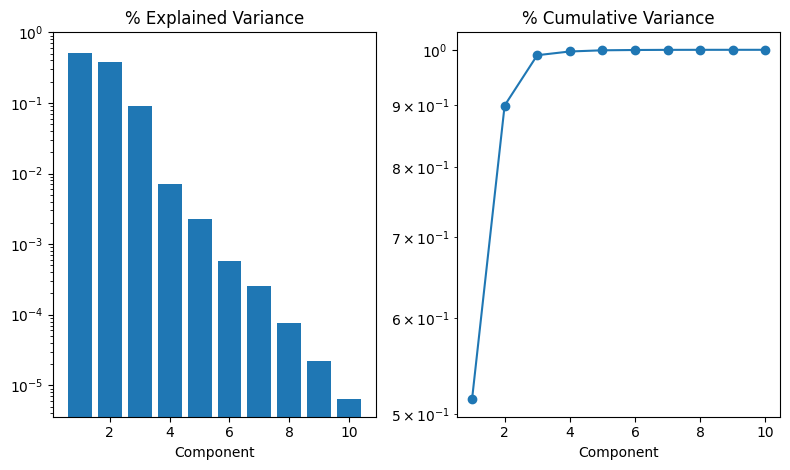

In [8]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    axs[0].bar(grid, explained_variance_ratio, log=True)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    axs[1].semilogy(grid, cumulative_explained_variance, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", 
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    fig.tight_layout()
    return axs

plot_variance(pca)

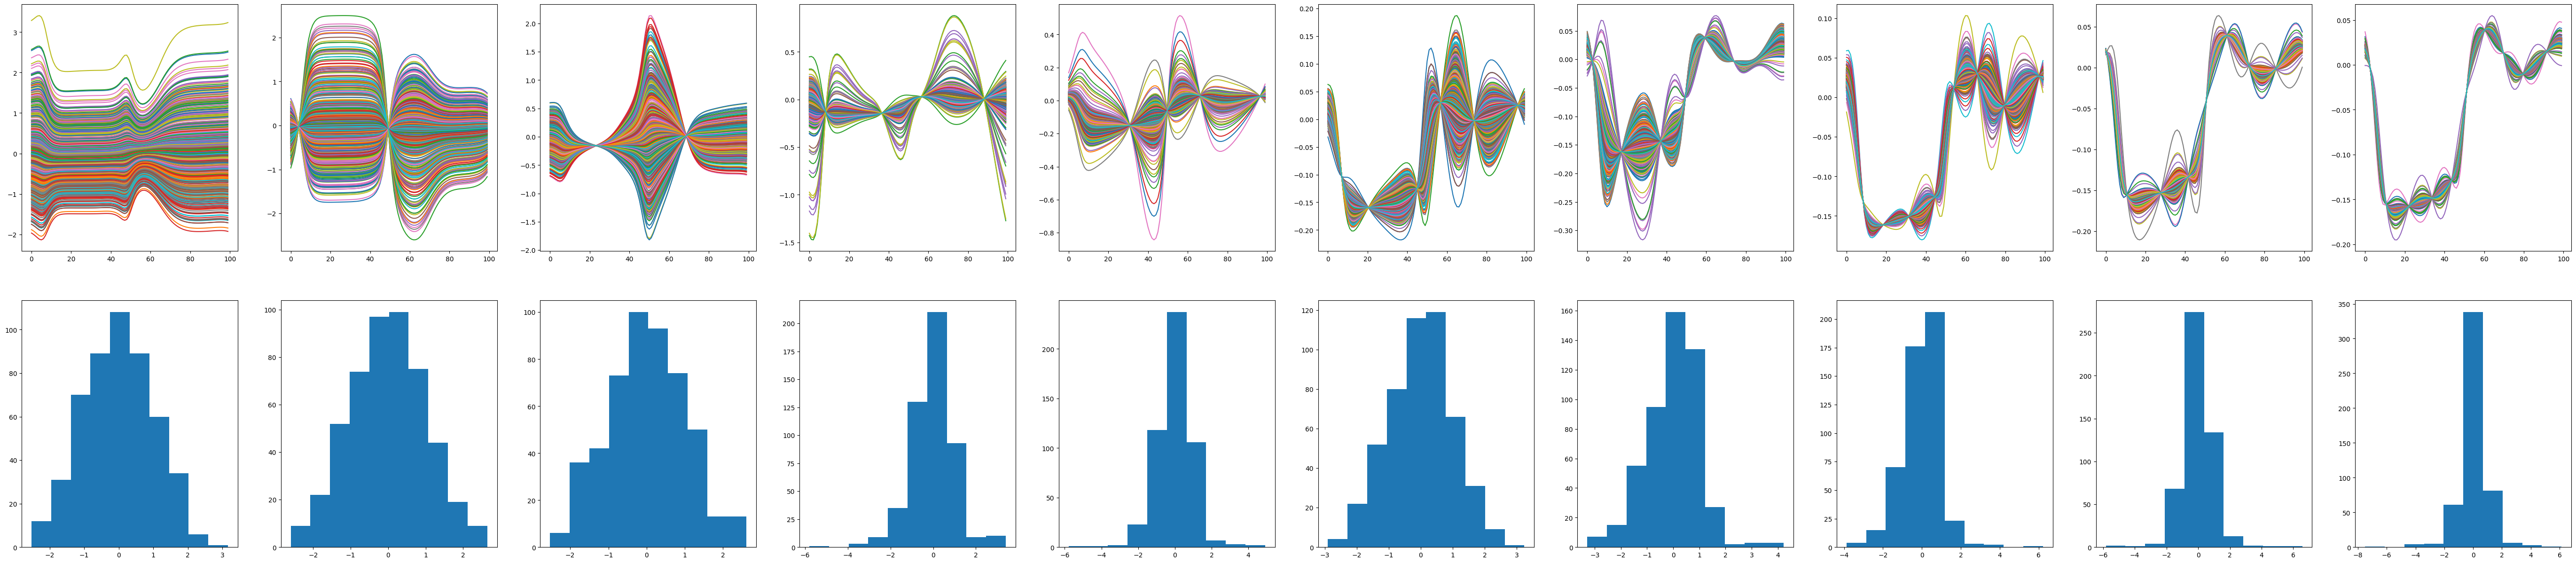

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PowerTransformer


pipeline = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('post',   PowerTransformer())
            ])

signals_pca = pipeline.fit_transform(X_scaled)

fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(70, 15))

for i in range(signals_pca.shape[1]):
    temp = np.zeros(signals_pca.shape)
    temp[:, i] = signals_pca[:, i]
    
    signals_new = pipeline.inverse_transform(temp)
    
    ax[1][i].hist(signals_pca[:,i], bins=10)
    for signal in signals_new:
        ax[0][i].plot(signal)
        
plt.show()

In [10]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

explained_variance_ratios = []
pca_components = []

for train_index, test_index in kf.split(X_scaled):
    X_train, _ = X_scaled[train_index], X_scaled[test_index]
    
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train)

    # Store the PCA components
    pca_components.append(pca.components_)
    # Store the explained variance ratio of this fold
    explained_variance_ratios.append(pca.explained_variance_ratio_)


explained_variance_ratios = np.array(explained_variance_ratios)

mean_explained_variance_ratio = np.mean(explained_variance_ratios, axis=0)
std_explained_variance_ratio = np.std(explained_variance_ratios, axis=0)

percentage_error = (std_explained_variance_ratio / mean_explained_variance_ratio) * 100
print(f'percentage error: \n{percentage_error}')
print(f'explained variance ratios: \n{explained_variance_ratios}')


percentage error: 
[1.36235167 1.99775524 3.30545103]
explained variance ratios: 
[[0.52246064 0.37166599 0.09468862]
 [0.515529   0.3845879  0.09011872]
 [0.5208212  0.38347574 0.08531004]
 [0.51765604 0.38290974 0.09058899]
 [0.50261604 0.39584518 0.09082556]]


### Save PCA Data

In [11]:
os.system(f'mkdir -p ../Emulation/Outputs/Output_{n_samples}_{n_params}params/PCA')

0

In [12]:
os.system(f'mkdir -p ../Emulation/Outputs/Output_{n_samples}_{n_params}params/PCA')

# Save first 3 Principle Component data
PC_list = []
for i in list(range(10)):

 PC = X_pca.iloc[:,i]
 PC.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/PCA/PC{i+1}.csv', index=False)
 PC_list.append(PC)




In [13]:
PC_df = pd.DataFrame(PC_list).T
PC_df.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", 
                 "PC6", "PC7", "PC8", "PC9", "PC10" ]
output = pd.concat([output_file, PC_df], axis=1)
output

,0,1,2,3,4,5,6,7,8,9,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.425990,0.365363,...,2.010339,-4.927742,-4.849830,1.054255,-0.714207,0.381396,-0.018271,-0.022392,-0.050590,-0.003390
1,2.374772,1.868053,1.457316,1.132088,0.880761,0.691446,0.552692,0.453999,0.386159,0.341405,...,-0.147596,0.188386,5.681269,-0.066665,0.287002,-0.056247,-0.194370,-0.002514,-0.053617,-0.004038
2,3.574609,2.871468,2.295324,1.833546,1.471666,1.194535,0.987291,0.836111,0.728704,0.654571,...,14.818185,12.657518,0.098421,-1.961298,-0.284584,0.117592,0.102575,-0.011058,-0.017913,0.096165
3,1.482799,1.162859,0.904226,0.700045,0.542785,0.424791,0.338732,0.277924,0.236521,0.209607,...,-14.628978,0.250733,3.345147,-0.363549,0.493110,0.461691,-0.029789,0.013657,0.015726,0.023424
4,2.597491,2.023392,1.558599,1.190695,0.906135,0.691223,0.532888,0.419253,0.339969,0.286370,...,-2.443804,-6.535087,-0.038967,0.316542,0.223709,-0.063933,0.051643,0.069657,-0.019264,0.007334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.098053,1.656948,1.300650,1.019284,0.802177,0.638606,0.518399,0.432354,0.372493,0.332159,...,-7.981343,2.922580,-2.906143,0.168458,-0.172187,0.150087,-0.057765,0.084363,-0.012789,-0.013380
496,2.384404,1.871600,1.455276,1.124923,0.868883,0.675219,0.532427,0.429967,0.358598,0.310531,...,-3.298229,-2.007228,2.568522,-0.439047,0.175248,0.093567,0.190156,0.047536,0.028723,-0.015185
497,2.732419,2.158420,1.692112,1.321801,1.034517,0.816981,0.656394,0.541028,0.460587,0.406382,...,0.807473,2.479621,-1.793580,-0.080150,-0.025147,-0.042682,-0.430168,0.081321,-0.001176,-0.014140
498,3.006426,2.328668,1.780655,1.347309,1.012328,0.759333,0.572783,0.438624,0.344666,0.280731,...,1.409930,-11.934384,-1.527488,0.902107,0.094907,-0.241220,0.103331,0.024200,-0.062212,0.033559


### Train Linear Emulator

In [14]:
import contextlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:

# Select relevant inputs only
relevant_columns = []
for col in cleaned_input_df.columns:
    relevant_columns.append(col)
    if col == 'T': break

#columns_with_multiple_values = df_x.nunique() > 1
#filtered_input = df_x.loc[:, columns_with_multiple_values]

# Select only first 5 inputs 
filtered_input = cleaned_input_df[relevant_columns]
filtered_input

,# svn.c,pat.r,pat.c,rv.E_act,T
0,27.687002,0.443723,3.278327,1.623082,0.478369
1,10.935100,0.243385,4.286711,2.717826,0.805784
2,18.671167,0.356841,2.549143,0.822205,0.950488
3,24.992088,0.155291,5.101243,3.333386,0.614289
4,22.700741,0.326891,3.862239,2.779415,0.551895
...,...,...,...,...,...
495,26.503853,0.225337,3.062925,1.221906,0.533058
496,25.720565,0.332556,5.365814,2.591307,0.870238
497,11.531353,0.218212,2.218123,1.474453,0.567655
498,19.351081,0.419443,4.246986,3.369710,0.431744


In [16]:
def emulate_linear(input, output):
 # Input and output data
 X = input
 Y = output

 # Initialize the model
 model = LinearRegression()

 # Fit the model to the training data
 model.fit(X, Y)

 # Predict the output for the test data
 y_pred = model.predict(X)

 # Compute R² score for the predictions versus actual test data
 r2 = r2_score(Y, y_pred)

 # compute MSE
 mse = mean_squared_error(Y, y_pred)

# compute RSE
 n = len(Y)   # Number of observations
 p = X.shape[1] + 1  # Number of parameters (including intercept)
 rss = np.sum((Y - y_pred) ** 2)  # Residual Sum of Squares
 rse = np.sqrt(rss / (n - p))
 

 return model, r2, mse, rse

In [17]:
emulate_linear(filtered_input, output=output['iT'])

(LinearRegression(), 1.0, 5.666009167338264e-28, 2.394749901857736e-14)

In [18]:
output.iloc[:,101:].columns

Index(['a_epad_ind', 'epad_ind', 'dia_ind', 'sys_ind', 'esp_ind', 't_max_dpdt',
       'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
       'a_alpha', 'b_alpha', 'a_beta', 'b_beta', 'cross_ind', 'cross_max',
       'A_p', 'P_max', 'esp', 'sys', 'EF', 'dia', 'tau', 'Ees/Ea', 'iT', 'iHR',
       'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
      dtype='object')

In [19]:
# Initialize dictionaries to store R2 scores and models
linear_r2_scores = {}
linear_mse_scores = {}
linear_rse_scores = {}
fitted_models = {}

# List of output keys to process
#output_keys = ['CO', 'EF', 'mPAP', 'dPAP', 'sPAP', 'PC1', 'PC2', 'PC3', 'PC4']
output_keys = output.iloc[:,101:].columns
#output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
#               'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'PC1', 'PC2', 'PC3']

# Iterate through the output keys
for key in output_keys:
    model, r2, mse, rse = emulate_linear(input=filtered_input, output=output[key])
    linear_r2_scores[key] = r2
    linear_mse_scores[key] = mse
    linear_rse_scores[key] = rse
    fitted_models[key] = model

# Convert the dictionaries to a DataFrame
results_df = pd.DataFrame({'R2_Score': linear_r2_scores, 'MSE': linear_mse_scores,  'RSE': linear_rse_scores, 'Model': fitted_models})
# Now `results_df` will be a DataFrame with column names as indices, R2 scores, and models
print(results_df)

# Save the DataFrame to a CSV file (models will not be saved in this step)
results_df.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}.csv')

# To save the DataFrame with models, use pickle
results_df.to_pickle(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}.csv')
results_df.to_pickle(f'/Users/pmzff/Documents/GitHub/GiessenDataAnalysis/Emulators/linear_models_and_r2_scores_{n_samples}.csv')


            R2_Score           MSE           RSE               Model
a_epad_ind  0.004149  5.939257e-03  7.753318e-02  LinearRegression()
epad_ind    0.924694  2.384763e-01  4.912970e-01  LinearRegression()
dia_ind     0.091052  7.425740e-02  2.741520e-01  LinearRegression()
sys_ind     0.733426  8.119270e+00  2.866685e+00  LinearRegression()
esp_ind     0.434250  1.421707e-01  3.793382e-01  LinearRegression()
t_max_dpdt  0.998386  1.483013e-05  3.874306e-03  LinearRegression()
a_epad      0.959158  3.067360e-01  5.571908e-01  LinearRegression()
epad        0.905400  1.393654e+00  1.187679e+00  LinearRegression()
s_a_epad    0.922397  1.176706e-01  3.451084e-01  LinearRegression()
s_epad      0.909596  6.844501e-01  8.323240e-01  LinearRegression()
min_dpdt    0.932531  1.285802e+03  3.607519e+01  LinearRegression()
max_dpdt    0.947770  1.815636e+03  4.286827e+01  LinearRegression()
a_alpha     0.976709  6.695779e-03  8.232317e-02  LinearRegression()
b_alpha     0.976665  7.802586e+02

In [26]:
results_df['R2_Score'].sort_values(ascending=False)

iT            1.000000
t_max_dpdt    0.998386
tau           0.991293
a_alpha       0.976709
b_alpha       0.976665
esp           0.976472
a_beta        0.967488
b_beta        0.967113
P_max         0.960754
sys           0.959635
cross_ind     0.959472
a_epad        0.959158
cross_max     0.957078
PC1           0.954867
A_p           0.951190
iHR           0.950410
max_dpdt      0.947770
Ees/Ea        0.947316
min_dpdt      0.932531
epad_ind      0.924694
s_a_epad      0.922397
EF            0.920967
s_epad        0.909596
epad          0.905400
PC2           0.838876
dia           0.765152
PC3           0.741233
sys_ind       0.733426
PC7           0.720384
PC6           0.484459
esp_ind       0.434250
PC4           0.261219
PC5           0.176160
dia_ind       0.091052
PC8           0.053464
PC10          0.020710
PC9           0.015008
a_epad_ind    0.004149
Name: R2_Score, dtype: float64

### Calibrate Emulator 

In [ ]:
calibrate_output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']
filtered_output = output[calibrate_output_keys]
filtered_output

In [ ]:
selected_rows = results_df.loc[calibrate_output_keys]
selected_rows


### Plot Observation 

In [ ]:
which_obs = 3

fig, ax = plt.subplots()

ind = which_obs

t = range(100) # Time adjustment
p_pat = output_file.iloc[ind, :100].values # Pressure transient

# Plot the pressure transient for each realization
ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Right Ventricle')

# Add legend to the plot
# ax.legend()
fig.set_size_inches(4,2)
# Display the plot
plt.show()

### Bayesian Calibration 

In [ ]:

# Selects which observation to calibrate on
which_obs = 3

## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001 #0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)/5

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)


In [ ]:
# Convert the calibrated inputs to a DataFrame
Mu_post_df = pd.DataFrame(Mu_post, index=filtered_input.iloc[which_obs].T.index)
true_observation = pd.DataFrame(filtered_input.iloc[which_obs])

# Feed calibrated x_hat back into linear model 
y_calibrated = (beta_matrix @ Mu_post) + intercept 

y_compare = np.hstack([Y_obs, y_calibrated])
y_compare = pd.DataFrame(y_compare)
y_compare.columns = ("y_true", "y_calibrated")

# Concatenate the true input value and calibrated values
bayes_result = pd.concat([filtered_input.iloc[which_obs].T, Mu_post_df, y_compare], axis=1)

# Rename the columns
bayes_result.columns = ['x_true', 'x_calibrated', "y_true", "y_calibrated"]

bayes_result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()
posterior_stds = np.sqrt(np.diag(Sigma_post))  # Extract standard deviations

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] - 3 * prior_stds[i], posterior_means[i] - 3 * posterior_stds[i])
    x_max = max(prior_means[i] + 3 * prior_stds[i], posterior_means[i] + 3 * posterior_stds[i])
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs
    prior_pdf = norm.pdf(x, prior_means[i], prior_stds[i])
    posterior_pdf = norm.pdf(x, posterior_means[i], posterior_stds[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

### MSE of Bayes Calibration for Multiple Observations

In [ ]:
## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15


# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2




# Build beta matrix (d * p, where d is dimension of y_obs and p is dinemnsion of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

x_differences = []

for row in range(10):
 # Select observation and reshape to be (d, 1)
 Y_obs = np.array(filtered_output.T[row])
 Y_obs = Y_obs.reshape(len(Y_obs), 1)
 
 # Scale observation by intercepts of models
 Y_scaled = Y_obs - intercept
 
 # dynamically set T 
 t_mu = filtered_input['T'][row]
 t_sd = 0.0000001 #0.15**2
 mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
 Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
 Sigma_0 = np.diag(Sd)

 # Compute the posterior covariance
 Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
 Sigma_post = np.linalg.inv(Sigma_post_inv)

 # Cmpute the posterior mean
 Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)

 # Compute squared-diff between true and calibrated x
 true = np.array(filtered_input.iloc[row].T)
 true = true.reshape(len(mu_0),1)
 diff = (Mu_post - true)**2 

 # Append arrary
 x_differences.append(diff)

# Compute MSE
bayes_mse_x = np.mean(np.hstack(x_differences), axis=1)

bayes_mse_x_df = pd.DataFrame(bayes_mse_x)
bayes_mse_x_df.columns = ['MSE']
bayes_mse_x_df.index = filtered_input.columns
#bayes_mse_x_df.to_csv('bayes_MSE_multi_output_x.csv')

bayes_mse_x_df

### Including model error and observation error

### Bayesian Calibration  
Assume we have the following linear regression model $$y = \beta X + \beta_0 + \epsilon_{model}, \epsilon_{model} \sim N_p(0, \sigma_{model}^2I)$$ 

Assume we also have the following observation model $$y_{obs} = y + \epsilon_{obs}, \epsilon_{obs} \sim N_p(0, \sigma_{obs}^2I)$$. 

The posterior distribution can be shown that $$\pi(X|y_{obs}) \sim N(\mu_{post}, \Sigma_{post})$$ where $$\mu_{post} = \Sigma_{post} \left( \beta^T \left( \sigma_{model}^2 + \sigma_{obs}^2\right)^{-1} y_{obs} + \Sigma_0^{-1}\mu_0\right)$$ and $$ \Sigma_{post} = \left( \beta^T( \sigma_{model}^2 + \sigma_{obs}^2)^{-1}\beta + \Sigma_0^{-1}\right)^{-1}$$


In [ ]:
# Selects which observation to calibrate on
which_obs = 3

## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001 #0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)


# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05
obs_error = np.std(filtered_output)*obs_error_scale
epsilon_obs = np.diag(obs_error)

# total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []


for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()
posterior_stds = np.sqrt(np.diag(Sigma_post))  # Extract standard deviations

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] - 3 * prior_stds[i], posterior_means[i] - 3 * posterior_stds[i])
    x_max = max(prior_means[i] + 3 * prior_stds[i], posterior_means[i] + 3 * posterior_stds[i])
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs
    prior_pdf = norm.pdf(x, prior_means[i], prior_stds[i])
    posterior_pdf = norm.pdf(x, posterior_means[i], posterior_stds[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()

plt.savefig("../Results/posterior__summarystats.png")
plt.show()


# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

In [ ]:
# Use default_rng() for reproducibility (with seed 1 as per your setup)
rg = np.random.default_rng(1)
samples = rg.multivariate_normal(Mu_post.flatten(), Sigma_post, size=100)  # Generate 10 samples
samples_df = pd.DataFrame(samples)
samples_df.to_csv("../Results/posterior_sample_summarystats.csv", index=False)

### Calibrate on whole pressure waveform

In [ ]:
output_keys = output.iloc[:,0:101].columns
#output_keys = list(output.iloc[:, :100].columns) + ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt', 'A_p', 'P_max', 'esp', 'sys', 'EF', 'Ees/Ea']

In [ ]:
# Initialize dictionaries to store R2 scores and models
linear_r2_scores = {}
linear_mse_scores = {}
linear_rse_scores = {}
fitted_models = {}

# List of output keys to process
#output_keys = ['CO', 'EF', 'mPAP', 'dPAP', 'sPAP', 'PC1', 'PC2', 'PC3', 'PC4']
output_keys = output_keys#output.iloc[:,0:101].columns
#output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
#               'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'PC1', 'PC2', 'PC3']

# Iterate through the output keys
for key in output_keys:
    model, r2, mse, rse = emulate_linear(input=filtered_input, output=output[key])
    linear_r2_scores[key] = r2
    linear_mse_scores[key] = mse
    linear_rse_scores[key] = rse
    fitted_models[key] = model

# Convert the dictionaries to a DataFrame
results_df = pd.DataFrame({'R2_Score': linear_r2_scores, 'MSE': linear_mse_scores,  'RSE': linear_rse_scores, 'Model': fitted_models})
# Now `results_df` will be a DataFrame with column names as indices, R2 scores, and models


# Save the DataFrame to a CSV file (models will not be saved in this step)
results_df.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}_waveform.csv')


# To save the DataFrame with models, use pickle
results_df.to_pickle(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}_waveform.csv')
results_df.to_pickle(f'/Users/pmzff/Documents/GitHub/GiessenDataAnalysis/Emulators/linear_models_and_r2_scores_{n_samples}_waveform.csv')

print(results_df)

In [ ]:
selected_rows = results_df
selected_rows


filtered_output = output.loc[:, output_keys]
filtered_output


In [ ]:
# Selects which observation to calibrate on
which_obs = 3

## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001 #0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)


# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05

# Take obs_error as 5% of sd of most varying parameter (max) so that all error is identical
obs_error = np.max(np.std(filtered_output) * obs_error_scale)
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
epsilon_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix

# total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []


for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()
posterior_stds = np.sqrt(np.diag(Sigma_post))  # Extract standard deviations

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] - 3 * prior_stds[i], posterior_means[i] - 3 * posterior_stds[i])
    x_max = max(prior_means[i] + 3 * prior_stds[i], posterior_means[i] + 3 * posterior_stds[i])
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs
    prior_pdf = norm.pdf(x, prior_means[i], prior_stds[i])
    posterior_pdf = norm.pdf(x, posterior_means[i], posterior_stds[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.savefig("../Results/posterior__waveform.png")
plt.show()

# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

In [ ]:
Dinv = np.diag(1 / np.sqrt(np.diag(Sigma_post))) 
corr = Dinv @ Sigma_post @ Dinv
corr

In [ ]:

# Feed calibrated x_hat back into linear model 
y_calibrated = (beta_matrix @ Mu_post) + intercept 

y_compare = np.hstack([Y_obs, y_calibrated])
y_compare = pd.DataFrame(y_compare)
y_compare.columns = ("y_true", "y_calibrated")
y_compare.shape


### Plotting posterior waveforms

In [ ]:
waveforms = pd.read_csv("../Results/waveform_resampled_all_pressure_traces_rv.csv")
summarystats = pd.read_csv("../Results/summarystats_resampled_all_pressure_traces_rv.csv")
y_true = pd.DataFrame(y_compare['y_true'])


In [ ]:
sqe = (waveforms.iloc[:,:101] - y_true.T.values)**2
sse = sqe.mean(axis=0)
sum_mse = sse.sum(axis=0)
sum_mse

# Plot
plt.figure(figsize=(10, 5))

# Plot y_true
plt.plot(y_true, label="True Waveform", color='c', linewidth=2)

# Plot all waveforms in a faded orange
for i in range(100):  # Loop over rows
    plt.plot(waveforms.iloc[i, :101], color='orange', alpha=0.1)  

# Compute and plot the mean waveform
mean_waveform = waveforms.iloc[:, :101].mean(axis=0)
plt.plot(mean_waveform, color='darkorange', linewidth=2, label="Mean Calibrated Waveform")
plt.xticks(ticks=np.arange(0, 110, 10))
# Labels and legend
plt.xlabel("Time Index")
plt.ylabel("Pressure (mmHg)")
plt.legend()
plt.title(f"Calibrated Pressure Waveforms (whole trace) S_MSE = {sum_mse}")

plt.show()

In [ ]:
sqe = (summarystats.iloc[:,:101] - y_true.T.values)**2
sse = sqe.mean(axis=0)
sum_mse = sse.sum(axis=0)
sum_mse

In [ ]:
sqe = (summarystats.iloc[:,:101] - y_true.T.values)**2
sse = sqe.mean(axis=0)
sum_mse = sse.sum(axis=0)
sum_mse


# Plot
plt.figure(figsize=(10, 5))

# Plot y_true
plt.plot(y_true, label="True Waveform", color='c', linewidth=2)

# Plot all waveforms in a faded orange
for i in range(100):  # Loop over rows
    plt.plot(summarystats.iloc[i, :101], color='orange', alpha=0.1)  

# Compute and plot the mean waveform
mean_waveform = summarystats.iloc[:, :101].mean(axis=0)
plt.plot(mean_waveform, color='darkorange', linewidth=2, label="Mean Calibrated Waveform")
plt.xticks(ticks=np.arange(0, 110, 10))
# Labels and legend
plt.xlabel("Time Index")
plt.ylabel("Pressure (mmHg)")
plt.legend()
plt.title(f"Calibrated Pressure Waveforms (summarys) S_MSE = {sum_mse}")

plt.show()

In [ ]:
# Use default_rng() for reproducibility (with seed 1 as per your setup)
rg = np.random.default_rng(1)
samples = rg.multivariate_normal(Mu_post.flatten(), Sigma_post, size=100)  # Generate 10 samples
samples_df = pd.DataFrame(samples)
samples_df.to_csv("../Results/posterior_sample_waveform.csv", index=False)

### Log input

In [ ]:
def emulate_linear_log(input, output):
 # Input and output data
 X = np.log(input)
 Y = output

 # Initialize the model
 model = LinearRegression()

 # Fit the model to the training data
 model.fit(X, Y)

 # Predict the output for the test data
 y_pred = model.predict(X)

 # Compute R² score for the predictions versus actual test data
 r2 = r2_score(Y, y_pred)

 # compute MSE
 mse = mean_squared_error(Y, y_pred)

# compute RSE
 n = len(Y)   # Number of observations
 p = X.shape[1] + 1  # Number of parameters (including intercept)
 rss = np.sum((Y - y_pred) ** 2)  # Residual Sum of Squares
 rse = np.sqrt(rss / (n - p))
 

 return model, r2, mse, rse

In [ ]:
# Initialize dictionaries to store R2 scores and models
linear_r2_scores = {}
linear_mse_scores = {}
linear_rse_scores = {}
fitted_models = {}

# List of output keys to process
#output_keys = ['CO', 'EF', 'mPAP', 'dPAP', 'sPAP', 'PC1', 'PC2', 'PC3', 'PC4']
output_keys = output.iloc[:,101:].columns
#output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
#               'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'PC1', 'PC2', 'PC3']

# Iterate through the output keys
for key in output_keys:
    model, r2, mse, rse = emulate_linear_log(input=filtered_input, output=output[key])
    linear_r2_scores[key] = r2
    linear_mse_scores[key] = mse
    linear_rse_scores[key] = rse
    fitted_models[key] = model

# Convert the dictionaries to a DataFrame
results_df_log = pd.DataFrame({'R2_Score': linear_r2_scores, 'MSE': linear_mse_scores,  'RSE': linear_rse_scores, 'Model': fitted_models})
# Now `results_df` will be a DataFrame with column names as indices, R2 scores, and models
print(results_df_log)

# Save the DataFrame to a CSV file (models will not be saved in this step)
results_df_log.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}_log.csv')

# To save the DataFrame with models, use pickle
results_df_log.to_pickle(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}_log.csv')
results_df_log.to_pickle(f'/Users/pmzff/Documents/GitHub/GiessenDataAnalysis/Emulators/linear_models_and_r2_scores_{n_samples}_log.csv')


In [ ]:
selected_rows = results_df_log.loc[calibrate_output_keys]
print(selected_rows.shape)


filtered_output = output.loc[:, calibrate_output_keys]
filtered_output.shape

In [ ]:
import numpy as np

# Select observation to calibrate on
which_obs = 3

## Define priors (convert to log-space)
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# Convert mean to log-space
mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
log_mu_0 = np.log(mu_0)

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001  # Small variance for temperature

Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)

# Convert variance to log-space using delta method: Var[log(X)] ≈ Var[X] / X^2
Sigma_0_log = np.diag( (1 / mu_0.flatten())**2 ) @ Sigma_0 @ np.diag( (1 / mu_0.flatten())**2 )

# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05
obs_error = np.std(filtered_output) * obs_error_scale
epsilon_obs = np.diag(obs_error)

# Total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert lists to NumPy arrays
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept).reshape(len(intercept), 1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs]).reshape(-1, 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance (in log-space)
Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0_log)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Compute the posterior mean (in log-space)
Mu_post_log = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0_log) @ log_mu_0)

# Convert back from log-space to original space
Mu_post = np.exp(Mu_post_log + 0.5 * np.diag(Sigma_post).reshape(-1, 1))  # Mean of log-normal
Sigma_post_diag = np.exp(2 * Mu_post_log + np.diag(Sigma_post).reshape(-1, 1)) * (np.exp(np.diag(Sigma_post).reshape(-1, 1)) - 1)  # Variance of log-normal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()  # Log-normal mean (already transformed)
posterior_stds = np.sqrt(Sigma_post_diag).flatten()  # Log-normal std dev

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Prior transformation to log-normal
    prior_mean_log = np.log(prior_means[i])
    prior_std_log = prior_stds[i] / prior_means[i]  # Delta method approx
    
    # Convert normal mean & std to log-normal parameters
    prior_shape = np.sqrt(np.log(1 + (prior_std_log**2)))
    prior_scale = np.exp(prior_mean_log)

    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] / 3, posterior_means[i] / 3)  # Avoid negative values
    x_max = max(prior_means[i] * 3, posterior_means[i] * 3)
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs using log-normal distributions
    prior_pdf = lognorm.pdf(x, prior_shape, scale=prior_scale)
    posterior_pdf = lognorm.pdf(x, np.sqrt(np.log(1 + (posterior_stds[i]**2 / posterior_means[i]**2))), scale=posterior_means[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

In [ ]:
beta_matrix @ np.log(Mu_post_df) + intercept

In [ ]:

true_values = filtered_input.iloc[which_obs].values
Mu_post.flatten() - true_values
